In [1]:
# Imort libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from collections import defaultdict, Counter
from datetime import datetime, timedelta

from sklearn.cross_validation import train_test_split, ShuffleSplit

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree, linear_model, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import r2_score, accuracy_score, fbeta_score, roc_auc_score
from sklearn.model_selection import cross_val_score
#from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import classification_report


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler

from sklearn import grid_search
from sklearn.metrics import fbeta_score, make_scorer



/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# load as Pandas dataframe

with open('/Users/dona/Documents/DonaRay/SpringBoard/git/SpringBoard/ultimate_challenge/ultimate_data_challenge.json') as file_obj:
   data_temp = json.load(file_obj)

df_all = pd.DataFrame(data_temp)
#df_all = df_all.drop(['avg_rating_of_driver'], axis=1)


In [3]:
print(df_all.info())
print(df_all.tail(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None
       avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
49999      3.49                   5.0                   NaN        1.0   

          city last_trip_date    phone signup_date  surge_pct  \
49999  Astapor     201

Variables avg_rating_by_driver, avg_rating_of_driver, phone have missing values. avg_rating_by_driver and phone have 
less than 500 missing values, and we can drop them from the dataset.
avg_rating_of driver has almost 8,000 missing data values, and this could be a problem. Alternatively, we can try 
dropping the variable from the datset. Doing this actually reduced the accuracy and ROC. Imputing values is not a good 
idea, since that leads to more errors or noise in the variables. For our analysis we drop the missing rows. 

In [4]:
# Remove rows with missing values
df_nonmissing = df_all.dropna()

#df_nonmissing[['sign_date_obj']] = datetime.strptime(df[['signup_date']],'%d/%m/%Y') 
#df_nonmissing[['signup_date']] = df[['signup_date']].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))

# Convery sign_up_date and last_trip_date to datetime objects
df_nonmissing['signup_date'] = pd.to_datetime(df_nonmissing['signup_date'])
df_nonmissing['last_trip_date'] = pd.to_datetime(df_nonmissing['last_trip_date'])

print(df_nonmissing.info())
print(df_nonmissing.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
signup_date               41445 non-null datetime64[ns]
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.8+ MB
None
   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0      

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [5]:
print(df_nonmissing['last_trip_date'].min())
print(df_nonmissing['last_trip_date'].max())
print(df_nonmissing['last_trip_date'].describe())

#df_nonmissing['day'] = pd.DatetimeIndex(df_nonmissing['signup_date']).day
print(df_nonmissing.head())

2014-01-01 00:00:00
2014-07-01 00:00:00
count                   41445
unique                    182
top       2014-06-29 00:00:00
freq                     1924
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object
   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-

In [6]:
# Define one-hot encoder function
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [7]:
# Define rider retain target variable. We define the rider as retianed if she was active in the preceding 30 days.
# We assume the last day the data was pulled was the the most recent recorded date trip for the column last_trip_date.
# This is so because there will be atleast one recorded ride everyday. This day is 1st July, 2014.

df_nonmissing['diff_days'] = (df_nonmissing['last_trip_date'].max() - df_nonmissing['last_trip_date'] )
                                
df_nonmissing['Target'] = (df_nonmissing['diff_days'] <= timedelta(30)).astype(int)

# Converting ultimate_black_user to a column of type interger from boolean
df_nonmissing['ultimate_black_user'] = df_nonmissing['ultimate_black_user'].astype(int)

# Create dummy variables for categorical variables 'phone' and 'city' using the function one_hot
df = one_hot(df_nonmissing, ['phone', 'city'])

print(df.head())
print(df.info())


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct diff_days  Target  \
0                       4                    1         46.2   14 days       1   
1       

In [8]:
def Print_Stats(df, num):
    #Prints basic summary statistics of a pandas dataframe    

    print(df.head(num))
    print(df.shape)
    print(df.info())
    print(df.columns)
    print(df.describe())
    
def Print_Frequency(df, bins = []):
    #Prints frequency distribution
    
    col_list = list(df.columns.values)
    
    if bins == []:
        for col in col_list:
            print(df[col].value_counts().sort_index())
    else:
        for col in col_list:
            print(pd.cut(df[col],bins).value_counts().sort_index())

In [9]:
# Frequencies of categorical variables

df_freq = df[['ultimate_black_user','Target', 'phone_Android', 'phone_iPhone', 'city_Astapor', 'city_Winterfell']]

Print_Frequency(df_freq)

0    25526
1    15919
Name: ultimate_black_user, dtype: int64
0    24410
1    17035
Name: Target, dtype: int64
0    29352
1    12093
Name: phone_Android, dtype: int64
0    12093
1    29352
Name: phone_iPhone, dtype: int64
0    27936
1    13509
Name: city_Astapor, dtype: int64
0    22284
1    19161
Name: city_Winterfell, dtype: int64


24,410 users out of 41445 or 58.89% of users are not retained while 17035 or 41.10% of users are retained. 

phone     Android     iPhone
Target                      
0       76.813032  51.516081
1       23.186968  48.483919


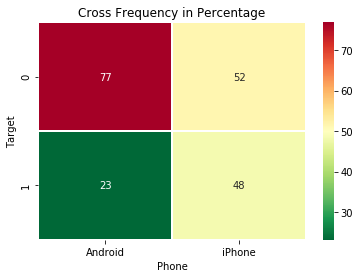

In [47]:
# Cross Frequencies

target_phone = pd.crosstab(df.Target, df.phone).apply(lambda r: r/r.sum() * 100, axis=0)

print(target_phone)

sns.heatmap(target_phone, cmap='RdYlGn_r', linewidths=0.5, annot=True)
plt.title('Cross Frequency in Percentage')
plt.xlabel('Phone')
plt.show()

The above figure shows the cross frequency of the variables: target and city. The target variable takes the value 1 if the user is retained and 0 otherwise. From the figure above, we can see that amongst iPhone users 52% are not retained while 48% are. On the other hand, almost 77% of Android users are not retained, and only 23% of Android users retain. This clear differnce is most likely due to income disparity between iPhone and Android users. Higher income groups (iPhone users) are more likely to retain than lower income group (Android users). 

city      Astapor  King's Landing  Winterfell
Target                                       
0       71.655933       34.632479   61.014561
1       28.344067       65.367521   38.985439


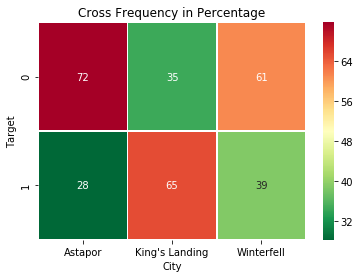

In [48]:
# Cross Frequencies

target_city = pd.crosstab(df.Target, df.city).apply(lambda r: r/r.sum() * 100, axis=0)

print(target_city)

sns.heatmap(target_city, cmap='RdYlGn_r', linewidths=0.5, annot=True)
plt.title('Cross Frequency in Percentage')
plt.xlabel('City')
plt.show()



We show a cross frequency of the variables city and target in percentages. From we the figure above, we note that that
while 65% of customers from "King's Landing city" retain, only 28% and 39% from Astapor and Winterfell retain. 

ultimate_black_user          0          1
Target                                   
0                    67.343101  45.354608
1                    32.656899  54.645392


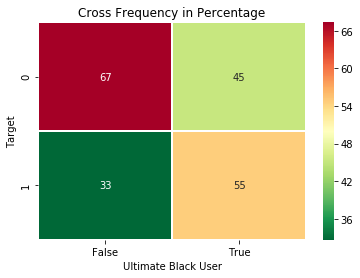

In [49]:
# Cross Frequencies
target_ubu = pd.crosstab(df.Target, df.ultimate_black_user).apply(lambda r: r/r.sum() * 100, axis=0)

print(target_ubu)

n_groups = 2
index = np.arange(n_groups)
bar_width = 0.5

sns.heatmap(target_ubu, cmap='RdYlGn_r', linewidths=0.5, annot=True)
plt.title('Cross Frequency in Percentage')
plt.xlabel('Ultimate Black User')
plt.xticks(index + bar_width, ('False', 'True'))
plt.show()


In [50]:
# Correlation coefficient 
df_cont = df[['avg_dist', 'avg_rating_of_driver', 'avg_rating_by_driver', 'avg_surge', 'surge_pct', 'weekday_pct',
             'trips_in_first_30_days']]
df_cont.corr()


,avg_dist,avg_rating_of_driver,avg_rating_by_driver,avg_surge,surge_pct,weekday_pct,trips_in_first_30_days
avg_dist,1.000000,0.034877,0.083190,-0.085750,-0.110894,0.102048,-0.136471
avg_rating_of_driver,0.034877,1.000000,0.122413,-0.022209,-0.001696,0.012975,-0.011849
avg_rating_by_driver,0.083190,0.122413,1.000000,0.012418,0.019703,0.018312,-0.045788
avg_surge,-0.085750,-0.022209,0.012418,1.000000,0.795737,-0.118999,-0.000262
surge_pct,-0.110894,-0.001696,0.019703,0.795737,1.000000,-0.155179,0.005370
weekday_pct,0.102048,0.012975,0.018312,-0.118999,-0.155179,1.000000,0.055556
trips_in_first_30_days,-0.136471,-0.011849,-0.045788,-0.000262,0.005370,0.055556,1.000000


The above table shows the correlation coefficiient of the all the continuous variables with each other. The only two variables that are highly correlated with each other is surge_pct and avg_surge with correlation coefficient around 80%. Naturally, individuals with a higher surge percentage will also have a higher average percentage. So while training the model, we will include not include either one (but not both together) of these variables in the model. We want the variables in the feature matrix to be as uncorrelated as possible with each other, but correlated with the dependent or endogenous variable. The correlation of the other varibles are insignificant or close to zero. Note that, the diagonal elements are all 1, because every varibale has a perfect correlation with itself. 

In [51]:
# Summary Statistics of continuous variables
Print_Stats(df_cont, 5)

   avg_dist  avg_rating_of_driver  avg_rating_by_driver  avg_surge  surge_pct  \
0      3.67                   4.7                   5.0       1.10       15.4   
1      8.26                   5.0                   5.0       1.00        0.0   
2      0.77                   4.3                   5.0       1.00        0.0   
3      2.36                   4.6                   4.9       1.14       20.0   
4      3.13                   4.4                   4.9       1.19       11.8   

   weekday_pct  trips_in_first_30_days  
0         46.2                       4  
1         50.0                       0  
2        100.0                       3  
3         80.0                       9  
4         82.4                      14  
(41445, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 7 columns):
avg_dist                  41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_rating_by_driver      41445 non-null float64
a

From the summary statistics above, we may consider scaling the data, especially for varibles avg_dist, surge_pct,
weekday_pct.

In [17]:
# Next we look at some box plots of some of the continuous variables by the Target variable. 
# Define box plot function

def drawBoxPlot(x, y, df, showfliers, title=''):
    sns.boxplot(x=x, y=y, data=df, showfliers=showfliers).set_title(title)
    plt.show()
    
    

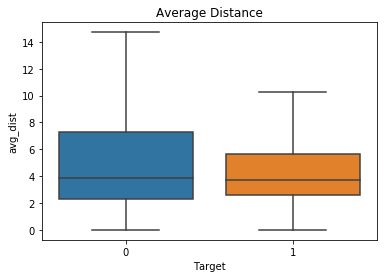

In [49]:
# Boxplot of Average Distance
drawBoxPlot('Target', 'avg_dist', df, showfliers=False, title='Average Distance')


The above figure shows the boxplot of Average Distance by Target. 75th percentile as well as the inter-quartile of 
non-retainers is higher. This indicates, non-regular cab users usually travel longer distances as opposed to regular
users. 
Note that the boxplot is not showing outliers

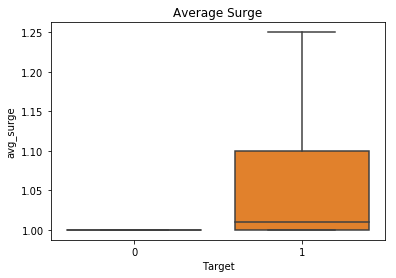

In [33]:
# Boxplot of Average Surge
drawBoxPlot('Target', 'avg_surge', df, showfliers=False, title='Average Surge')



From the boxplot above, median, third quartile, and the inter-quartile range of average surge of retainers is higher.
Again, higher income groups are likely to continue being customers with higher surge values, and are also more likely
to be retainers. 

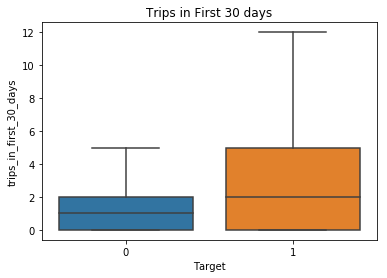

In [60]:
drawBoxPlot('Target', 'trips_in_first_30_days', df, showfliers=False, title='Trips in First 30 days')



From the above boxplot, the median, third quartile adn the interquartile range for number of trips taken in first 30
days is higher for individuals who eventually retain. Not surprisingly, higher frequency users in the first month of 
signup are most likely to retain. 

# Modelling

In [10]:
# Creating feature and target data set
df = df.rename(columns={"city_King's Landing" : 'city_KingsLanding'})
#df_modeling = df.drop(['city', 'phone', 'phone_iPhone', 'city_KingsLanding', 'surge_pct'])



df_modeling = df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'trips_in_first_30_days', 
                 'weekday_pct', 'phone_Android', 'city_Astapor', 'city_Winterfell', 'ultimate_black_user', 'Target']]

# Feature matrix
feature = df_modeling.drop(['Target'], axis=1)

# Target variable
target = df_modeling['Target']

In [11]:
# Define a function to fit and print results

def Model(X_train, y_train, X_test, y_test, classifier):
    reg = classifier.fit(X_train, y_train)
    
    # Compute metrics
    y_pred = reg.predict(X_test)
    score = r2_score(y_test, y_pred)
    score_1 = reg.score(X_test, y_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, reg.predict(X_train))
    
    print('Accuracy score on training data: {:.4f}'.format(accuracy_train))
    print('Accuracy score on testing data: {:.4f}'.format(accuracy_test))
    print('')    
    
    
    print('Roc score: {:.4f}'.format(roc_score))
    print('')

    # Generate the confusion matrix and classification report
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print('')
    
    print('Classification Report')
    print(classification_report(y_test, y_pred))

    return reg

In [40]:
# Scaling the data for Logistic Regression
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(feature)


In [12]:
# Split the data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=99)


In [37]:
# Scaling data for K-NN and SVM
X_train = preprocessing.scale(X_train_ns)
X_test = preprocessing.scale(X_test_ns)

In [13]:
# Grid Search
# Initialize the classifier
clf = linear_model.LogisticRegression(random_state = 100, class_weight = 'balanced')

# Define Parameter Space
parameters = {'C': [0.01,0.1,1,10,100]}

#Instantiate Grid Search Object
grid_LR = grid_search.GridSearchCV(estimator = clf, param_grid = parameters, n_jobs=-1)


# Fit the object to training data
grid_LR.fit(X_train, y_train)

print('Results using Logistic Regression\n------')
reg_LR = Model(X_train, y_train, X_test, y_test, grid_LR)

# Count Vectorizer
print('Logistic Regression\n-----')
print(reg_LR.best_params_)


Results using Logistic Regression
------
Accuracy score on training data: 0.6981
Accuracy score on testing data: 0.7053

Roc score: 0.7008

Confusion Matrix
[[3551 1345]
 [1098 2295]]

Classification Report
             precision    recall  f1-score   support

          0       0.76      0.73      0.74      4896
          1       0.63      0.68      0.65      3393

avg / total       0.71      0.71      0.71      8289

Logistic Regression
-----
{'C': 1}


In [31]:
#Cuurant pass
#LR = linear_model.LogisticRegression(C=1, random_state = 100, class_weight = 'balanced').fit(X_train, y_train)

#print(LR.coef_)

In [ ]:
#df_modeling = df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'trips_in_first_30_days', 
                 #'weekday_pct', 'phone_Android', 'city_Astapor', 'city_Winterfell', 'ultimate_black_user', 'Target']]

In [14]:
# Split the data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=99)

# Grid Search
# Initialize the classifier
clf = tree.DecisionTreeClassifier(random_state = 100, class_weight = 'balanced')

# Define Parameter Space
# TODO: Create the parameters list you wish to tune
parameters = {'min_samples_leaf': [5, 10, 15, 20, 25, 30],
             "max_leaf_nodes": [2, 5, 15, 20, 25, 30, 35, 50]}
             #"criterion": ['gini', 'entropy']}

#Instantiate Grid Search Object
grid_DT = grid_search.GridSearchCV(estimator = clf, param_grid = parameters, n_jobs=-1)


# Fit the object to training data
grid_DT.fit(X_train, y_train)

print('Results using Decision Tree\n------')
reg_DT = Model(X_train, y_train, X_test, y_test, grid_DT)

# Count Vectorizer
print('Decision Tree\n-----')
print(reg_DT.best_params_)


Results using Decision Tree
------
Accuracy score on training data: 0.7590
Accuracy score on testing data: 0.7579

Roc score: 0.7508

Confusion Matrix
[[3866 1030]
 [ 977 2416]]

Classification Report
             precision    recall  f1-score   support

          0       0.80      0.79      0.79      4896
          1       0.70      0.71      0.71      3393

avg / total       0.76      0.76      0.76      8289

Decision Tree
-----
{'max_leaf_nodes': 50, 'min_samples_leaf': 5}


In [63]:
# Grid Search
# Initialize the classifier
clf = RandomForestClassifier(random_state = 100, class_weight = 'balanced')

# Define Parameter Space
parameters = {'min_samples_leaf': [10, 20, 25, 50],
             "max_leaf_nodes": [5, 25, 30, 50, 75],
             "n_estimators": [10, 50, 100, 150, 200]}

#Instantiate Grid Search Object
grid_RF = grid_search.GridSearchCV(estimator = clf, param_grid = parameters, n_jobs=-1)


# Fit the object to training data
grid_RF.fit(X_train, y_train)

print('Results using Random Forest\n------')
reg_RF = Model(X_train, y_train, X_test, y_test, grid_RF)

# Count Vectorizer
print('Random Forest\n-----')
print(reg_RF.best_params_)

Results using Random Forest
------
Accuracy score on training data: 0.7743
Accuracy score on testing data: 0.7699

Roc score: 0.7656

Confusion Matrix
[[3865 1031]
 [ 876 2517]]

Classification Report
             precision    recall  f1-score   support

          0       0.82      0.79      0.80      4896
          1       0.71      0.74      0.73      3393

avg / total       0.77      0.77      0.77      8289

Random Forest
-----
{'max_leaf_nodes': 75, 'min_samples_leaf': 10, 'n_estimators': 100}


In [64]:
reg_RF_final = RandomForestClassifier(n_estimators=100, random_state = 100, class_weight = 'balanced', 
                                      max_leaf_nodes=75, min_samples_leaf=10).fit(X_train, y_train)


In [65]:
#Cuurant pass
print(reg_RF_final.feature_importances_)

[0.02126716 0.2414652  0.02762857 0.15853928 0.04070058 0.17352536
 0.11316848 0.08001786 0.06059569 0.08309183]


In [ ]:
df_modeling = df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'trips_in_first_30_days', 
                 'weekday_pct', 'phone_Android', 'city_Astapor', 'city_Winterfell', 'ultimate_black_user', 'Target']]

average_rating_by_driver, surge_pct, weekday_pct and phone_android are the top four predictive features. 

Ultimate may consider giving incentives like free rides for users receiving high ratings from drivers. These are 
probably infrequent riders giving higher than averge tips. 
Users with a high percent of trips occuring during a weekday, are most likely using it for work commute, either locals
or out of town individuals. Ultimate would need to look deeper into why these individuals are not retaining. Its
possible work related commute has reduced, or Ultimate should consider giving incentives like free rides, upgrade to 
black or free snacks and drinks for Gold/Platinum riders to individuals who have a higher percentage of rides on
weekdays.
Android users who are probably in the lower income range, are also less likely to retain. 
Users with a higher surge percentage are more likely to retain. Again, these are users whose demand to rides
is relatively inelastic with respect to price.

We would like to predict whether or not the user will be active in the 6th month, that is if the user is a retainer. 
This is a supervised binary classification model, since we have a target variable. The target variable takes the value 1 if the user is retained and 0 otherwise. To make our prediction, we train our classifier using feature matrix and target label. The feature space comprises of 10 variables (columns) and 41445 data points (rows). The dimension is small and so we can use supervised learning methodologies like Logisitic, Decision Tree and Random Forest. We 
also balance the model prior to training, so that the results will not be influenced by the dominating class. 

Each of these models can tend to overfit (low bias, but high variance), that is, the algoritm might try to learn patterns in the training set that do not generalize to the overall population. To overcome this problem, we split the
data into training and a test set (80% of the data is used for training and 20% is used for testing). Testing the model on a hold out data that the model has not been trained on, ensures that the model does not get learned on occasional erroneous labels. In addition, we use k-fold cross-validation technique. The k-fold cross-validation then splits the training data into k folds, and uses (k-1) folds in each iteration for training the model. We can then evaluate the performance of the classifier by taking an average of the accuracy score of all the models of all k iterations.  

In order to control for over-fitting, we incorporate a regularization paramter for the logistic regression. For the Decision Tree, there are severals ways to prune the tree. We restrict the size of the tree, by using the parameters
minimum samples per node and maimum number of end-nodes. To find the optimal values of these hyperparameters, we 
fine-tune the model by doing an exhaustive search over a range of values for the hyperparameters using sklearn's
GridSearch technique. 

For a small data set with only 10 variables, the model is doing pretty good. The Random Forest classifier does the best with an accuracy of 0.77 and ROC of 0.77 as well. The accuracy on the training and test data is very close, indicating, the model is not over-fitting. This is a very good thing, the model is not caturing erroneous patterns in the data. 

On the other hand, we would like the accuracy to be above 80%. It is possible that we are missing some explanatory 
variables that might help predict rider retention. For example, people who live and work in the city and dont own a 
car, who travel out of town often for work, frequent weekend users. 